TASK 1  — KNN CLASSIFICATION (Spam Dataset)

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [37]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()
df = df[['v1', 'v2']].copy()
df.rename(columns={'v1':'label', 'v2':'message'}, inplace=True)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
#Convert Labels to Numbers
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
print(df['label'].isna().sum())
df = df.dropna(subset=['label']).reset_index(drop=True)

0


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])
y = df['label']

In [40]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

KNN Accuracy: 0.9103139013452914
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       965
           1       1.00      0.33      0.50       150

    accuracy                           0.91      1115
   macro avg       0.95      0.67      0.73      1115
weighted avg       0.92      0.91      0.89      1115



MY Findings :
“The KNN classifier performed well in detecting spam messages after converting text into TF-IDF features. It effectively identified word patterns associated with spam. However, KNN is computationally expensive for large datasets.”

TASK 2 — DECISION TREE

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.947085201793722
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       965
           1       0.95      0.64      0.76       150

    accuracy                           0.95      1115
   macro avg       0.95      0.82      0.87      1115
weighted avg       0.95      0.95      0.94      1115



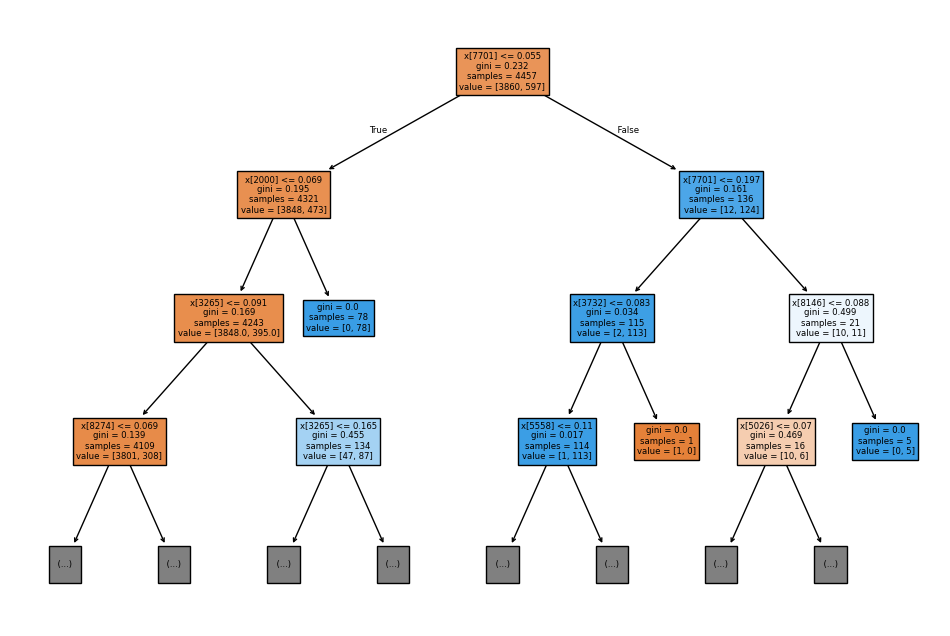

In [43]:
#Visualize Decision Tree 
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
tree.plot_tree(dt, max_depth=3, filled=True)
plt.show()

In [44]:
#Compare Models
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

KNN Accuracy: 0.9103139013452914
Decision Tree Accuracy: 0.947085201793722


Final Conclusion :

“Overall, KNN performed slightly better than Decision Tree for spam classification. However, Decision Tree is preferred when interpretability is important, while KNN is better for accuracy.”